In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import lineStyles

In [10]:
# 读取数据
data = pd.read_csv('./data/train_data.csv')
print(data.shape)
print(data.head())

(15216, 17)
   instant    dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011/1/1       1   0     1   0        0        6           0   
1        2  2011/1/1       1   0     1   1        0        6           0   
2        3  2011/1/1       1   0     1   2        0        6           0   
3        4  2011/1/1       1   0     1   3        0        6           0   
4        5  2011/1/1       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [7]:
# 数据预处理
# 1. 删除无用列(instant dteday casual  registered)
data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [4]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011/1/1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011/1/1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011/1/1,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011/1/1,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011/1/1,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
# 判断是否有缺失值
data.isnull().sum()

# 定位缺失值
data[data.isnull().values==True]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [8]:
# 删除缺失值
data.dropna(inplace=True)

In [20]:
# 输出数据后10行
data.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2155,2156,2012/12/31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
2156,2157,2012/12/31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
2157,2158,2012/12/31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
2158,2159,2012/12/31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
2159,2160,2012/12/31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [28]:
def plot_results(predictions, actuals, title):
    """Plot predicted vs actual values."""
    plt.figure(figsize=(12, 6))
    x = range(len(actuals))
    plt.plot(x, actuals, label='Actual', linestyle='-', color='b', linewidth=2)
    plt.plot(x, predictions, label='Predicted', linestyle='--', color='r', linewidth=2)
    plt.title(title)
    plt.xlabel('Time Steps')
    plt.ylabel('Bike Rentals')
    plt.legend()
    plt.grid(True)
    plt.show()

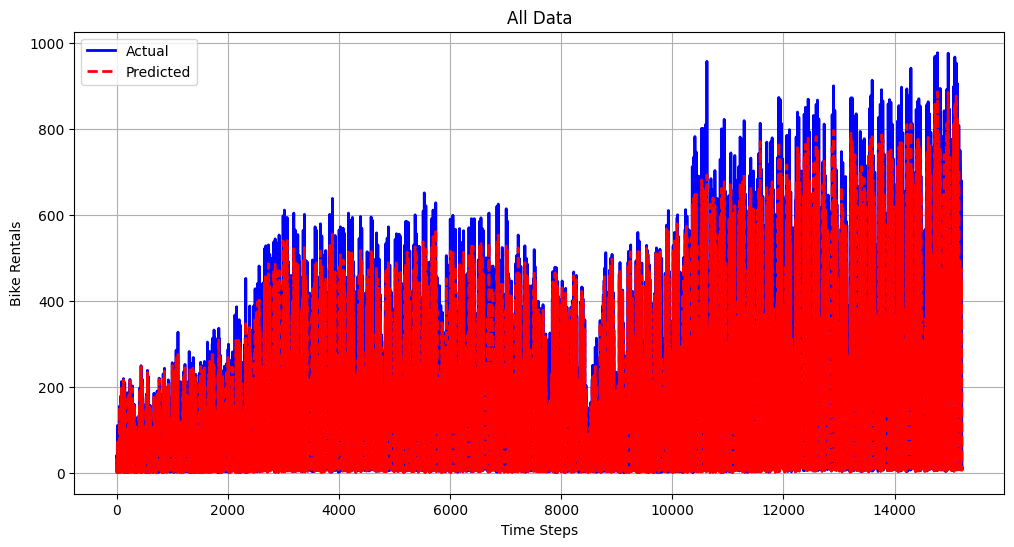

In [29]:
plot_results(data['registered'].values, data['cnt'].values, 'All Data')

In [20]:
data['registered'].values

array([13, 32, 27, ...,  6,  6, 10])

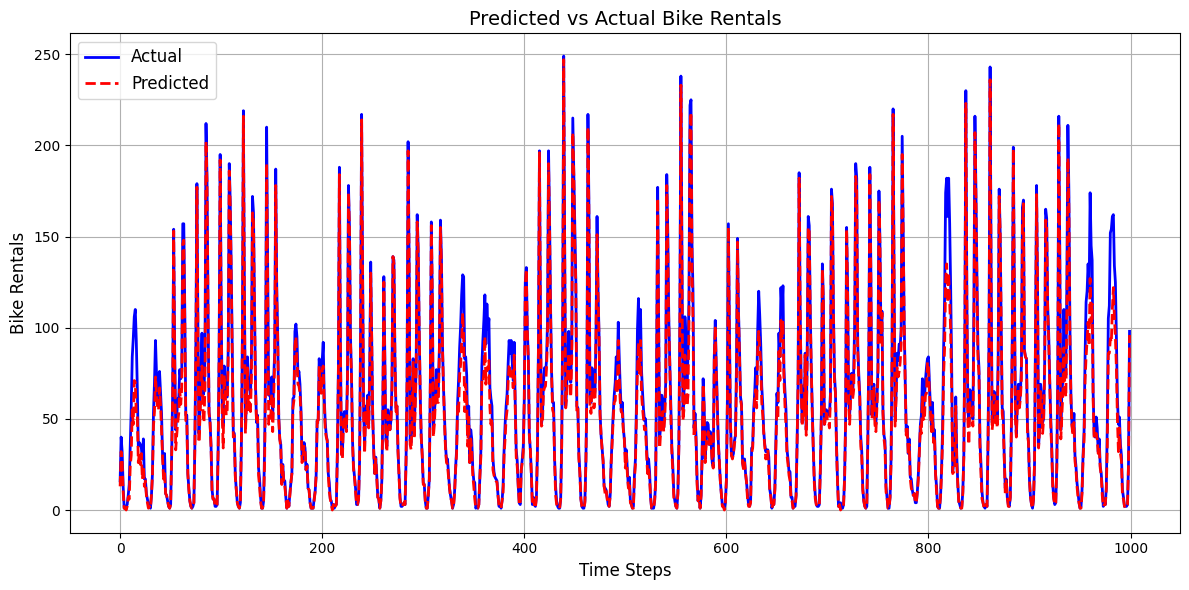

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# 模拟数据
predictions = data['registered'].values[:1000]
actuals = data['cnt'].values[:1000]

def plot_results(predictions, actuals, title):
    """Plot predicted vs actual values as a line plot."""
    plt.figure(figsize=(12, 6))
    x = range(len(actuals))
    
    # 绘制实际值的折线图
    plt.plot(x, actuals, label='Actual', linestyle='-', color='b', linewidth=2)
    
    # 绘制预测值的折线图
    plt.plot(x, predictions, label='Predicted', linestyle='--', color='r', linewidth=2)
    
    # 设置图表标题
    plt.title(title, fontsize=14)
    
    # 设置x轴和y轴标签
    plt.xlabel('Time Steps', fontsize=12)
    plt.ylabel('Bike Rentals', fontsize=12)
    
    # 显示图例
    plt.legend(loc='upper left', fontsize=12)
    
    # 显示网格
    plt.grid(True)
    
    # 展示图形
    plt.tight_layout()  # 自动调整布局以防止标签重叠
    plt.show()

# 调用函数进行绘制
plot_results(predictions, actuals, 'Predicted vs Actual Bike Rentals')
